Dataset Information:
Aquaponics meta-data
The enclosed datasets are generated from freshwater aquaponics catfish ponds. The datasets are generated automatically at 5 seconds intervals using the following water quality sensors driven by the ESP 32 microcontroller: Dallas Instrument Temperature sensor (DS18B20), DF Robot Turbidity sensor, DF Robot Dissolved Oxygen sensor, DF Robot pH sensor V2.2, MQ-137 Ammonia sensor, and MQ-135 Nitrate sensor.
The project is funded by the Lacuna Award for Agriculture in Sub-Saharan Africa 2020 under the management of the Meridian Institute Colorado, USA.
The datasets and results in this section were sensor readings from June to mid-October 2021. There are 12 datasets, each from 12 aquaponics catfish ponds. Each of the 12 ponds IoT unit has six sensors (temperature, turbidity, dissolved oxygen, pH, ammonia, nitrate). As of the time of this report each unit has generated over 170,000 instances. The datasets are downloaded at intervals, cleaned, and labelled.

The attributes are:
1) Date/Time
2) Temperature
3) Turbidity
4) Dissolved Oxygen (DO)
5) pH
6) Ammonia
7) Nitrate
8) Population of fish in the pond
9)Length of Fish
10) Weight of Fish

Attribute Information:
All attributes are continuous

No statistics available, but suggest to standardise variables for certain uses (e.g. for use with classifiers that are NOT scale-invariant)

NOTE: Attributes 9 and 10 are class identifiers that can be used differently. For example, one may need to predict the length of the fish using the water quality parameters (2-7) or in addition to the population or stocking density (parameter 8). Similarly, the same can be done using the weight attribute.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_raw1= pd.read_csv("IoTPond3.csv", delimiter = ",",low_memory=False)

In [3]:
df_raw1.head(5)

,created_at,entry_id,Temperature(C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:04 CET,1941,23.75,80,27.736,7.04911,5.15546,114,50,6.74,3.2
1,2021-06-19 00:00:26 CET,1942,23.75,80,4.195,7.09450,4.53072,114,50,6.74,3.2
2,2021-06-19 00:02:03 CET,1945,23.75,80,10.310,7.07635,5.21473,113,50,6.74,3.2
3,2021-06-19 00:02:26 CET,1946,23.75,81,1.196,7.07181,5.41747,100,50,6.74,3.2
4,2021-06-19 00:03:31 CET,1948,23.75,80,2.338,7.08996,5.45899,112,50,6.74,3.2


Lets investigate Pond-3

In [4]:
df_raw1.columns=['created_at', 'entry_id','Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight']

In [5]:
df_raw1.describe()

,entry_id,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
count,169185.000000,169185.000000,169185.000000,169185.000000,169185.000000,1.690780e+05,169185.000000,169185.0,169185.000000,169185.000000
mean,88079.861164,23.779466,83.384898,7.456181,7.184931,inf,380.670804,50.0,16.058793,44.259006
std,48888.942496,1.549207,26.651853,6.410530,0.629428,NaN,255.443631,0.0,5.001695,45.519340
min,1941.000000,-127.000000,8.000000,0.008000,-0.531800,0.000000e+00,0.000000,50.0,6.740000,3.200000
25%,45813.000000,23.375000,80.000000,5.080000,7.244310,5.759120e+00,123.000000,50.0,13.320000,19.380000
50%,88109.000000,23.750000,98.000000,5.080000,7.307860,2.942574e+01,417.000000,50.0,15.540000,35.830000
75%,130405.000000,24.125000,100.000000,8.088000,7.344170,1.009766e+03,585.000000,50.0,18.860000,46.680000
max,172701.000000,26.562500,100.000000,41.384000,11.456930,inf,3870.000000,50.0,33.000000,294.920000


There are some missing data - Ammonia 

In [6]:
df_raw1.dtypes

created_at           object
entry_id              int64
Temperature         float64
Turbidity             int64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate               int64
Population            int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

<AxesSubplot:>

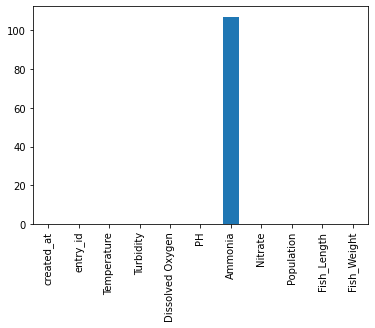

In [7]:
df_raw1.isna().sum().plot.bar()

In [8]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

/home/rupamay/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [9]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [10]:
df_raw1.drop(columns='entry_id', axis=1,inplace=True)

In [11]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [12]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,23.75,80,27.736,7.04911,5.15546,114,50,6.74,3.2,2021-06-19 00:00:04,2021-06-19,00:00:04
1,23.75,80,4.195,7.09450,4.53072,114,50,6.74,3.2,2021-06-19 00:00:26,2021-06-19,00:00:26
2,23.75,80,10.310,7.07635,5.21473,113,50,6.74,3.2,2021-06-19 00:02:03,2021-06-19,00:02:03
3,23.75,81,1.196,7.07181,5.41747,100,50,6.74,3.2,2021-06-19 00:02:26,2021-06-19,00:02:26
4,23.75,80,2.338,7.08996,5.45899,112,50,6.74,3.2,2021-06-19 00:03:31,2021-06-19,00:03:31


In [13]:
df_na = df_raw1.drop('Date', axis = 1).isna().groupby(df_raw1.Date, sort = False).sum().reset_index()

<AxesSubplot:xlabel='Date'>

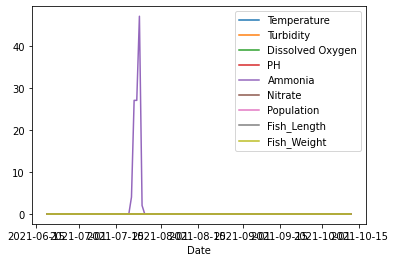

In [14]:
df_na.plot(x='Date', y=['Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight'])


We can see that only Ammonia has missing data.We can either drop the whole Ammonia missing records or impute them with the last reading . 

Sort DataFrame by Date (Datetime)

In [15]:
df=df_raw1.sort_values(by='Datetime') 

In [16]:
df_raw1 = df_raw1.dropna()

array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>], dtype=object)

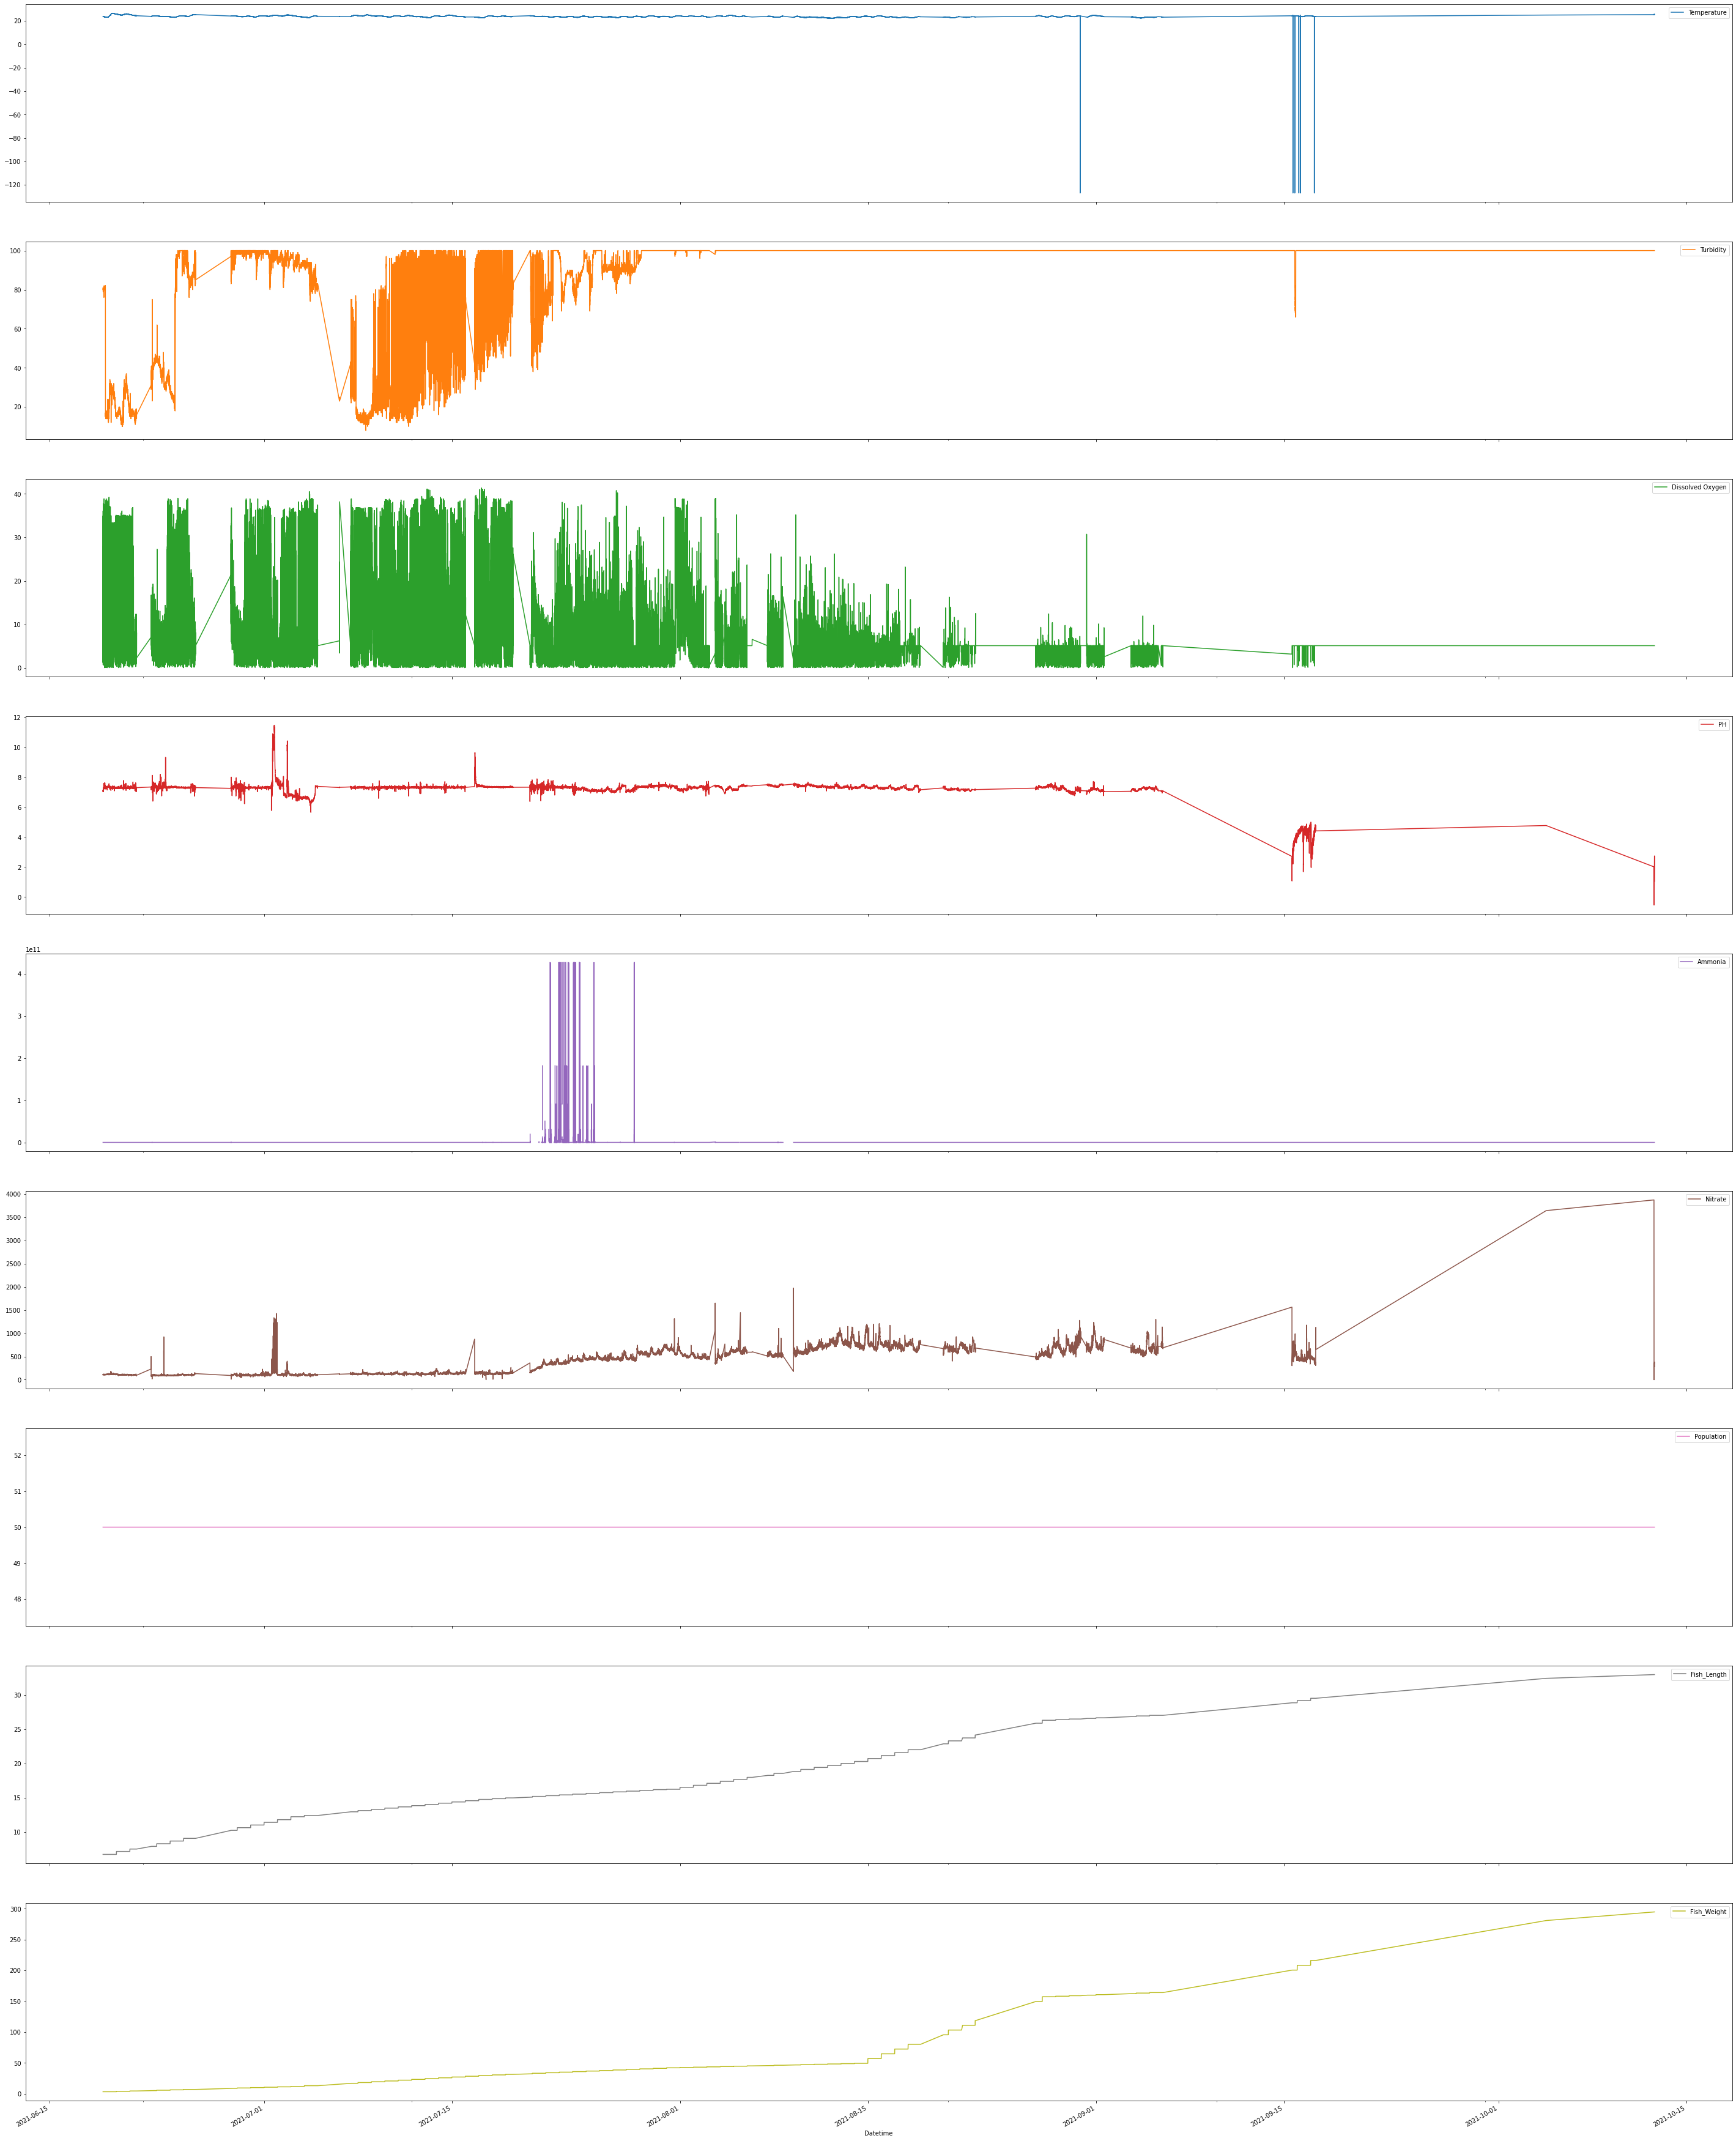

In [17]:
df.plot('Datetime',['Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight'], subplots = True, figsize = (50,70))

Data Covariance and Correlation

In [18]:
corr = df.corr()
corr

<ipython-input-18-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
Temperature,1.000000,-0.160361,0.093728,0.024845,-0.005974,-0.166847,NaN,-0.168776,-0.092913
Turbidity,-0.160361,1.000000,-0.365851,-0.101522,0.002571,0.542542,NaN,0.509700,0.355407
Dissolved Oxygen,0.093728,-0.365851,1.000000,0.062159,-0.005252,-0.323166,NaN,-0.267240,-0.206917
PH,0.024845,-0.101522,0.062159,1.000000,0.002970,-0.021847,NaN,-0.421913,-0.590120
Ammonia,-0.005974,0.002571,-0.005252,0.002970,1.000000,0.000731,NaN,-0.003471,-0.005916
Nitrate,-0.166847,0.542542,-0.323166,-0.021847,0.000731,1.000000,NaN,0.738499,0.531685
Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fish_Length,-0.168776,0.509700,-0.267240,-0.421913,-0.003471,0.738499,NaN,1.000000,0.913650
Fish_Weight,-0.092913,0.355407,-0.206917,-0.590120,-0.005916,0.531685,NaN,0.913650,1.000000


<AxesSubplot:>

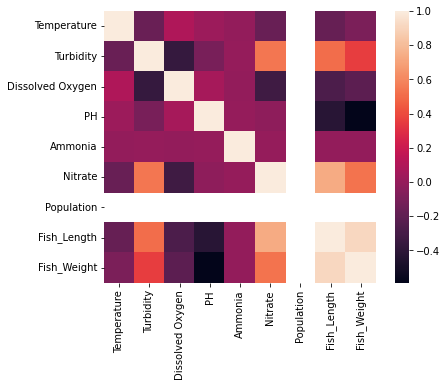

In [19]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

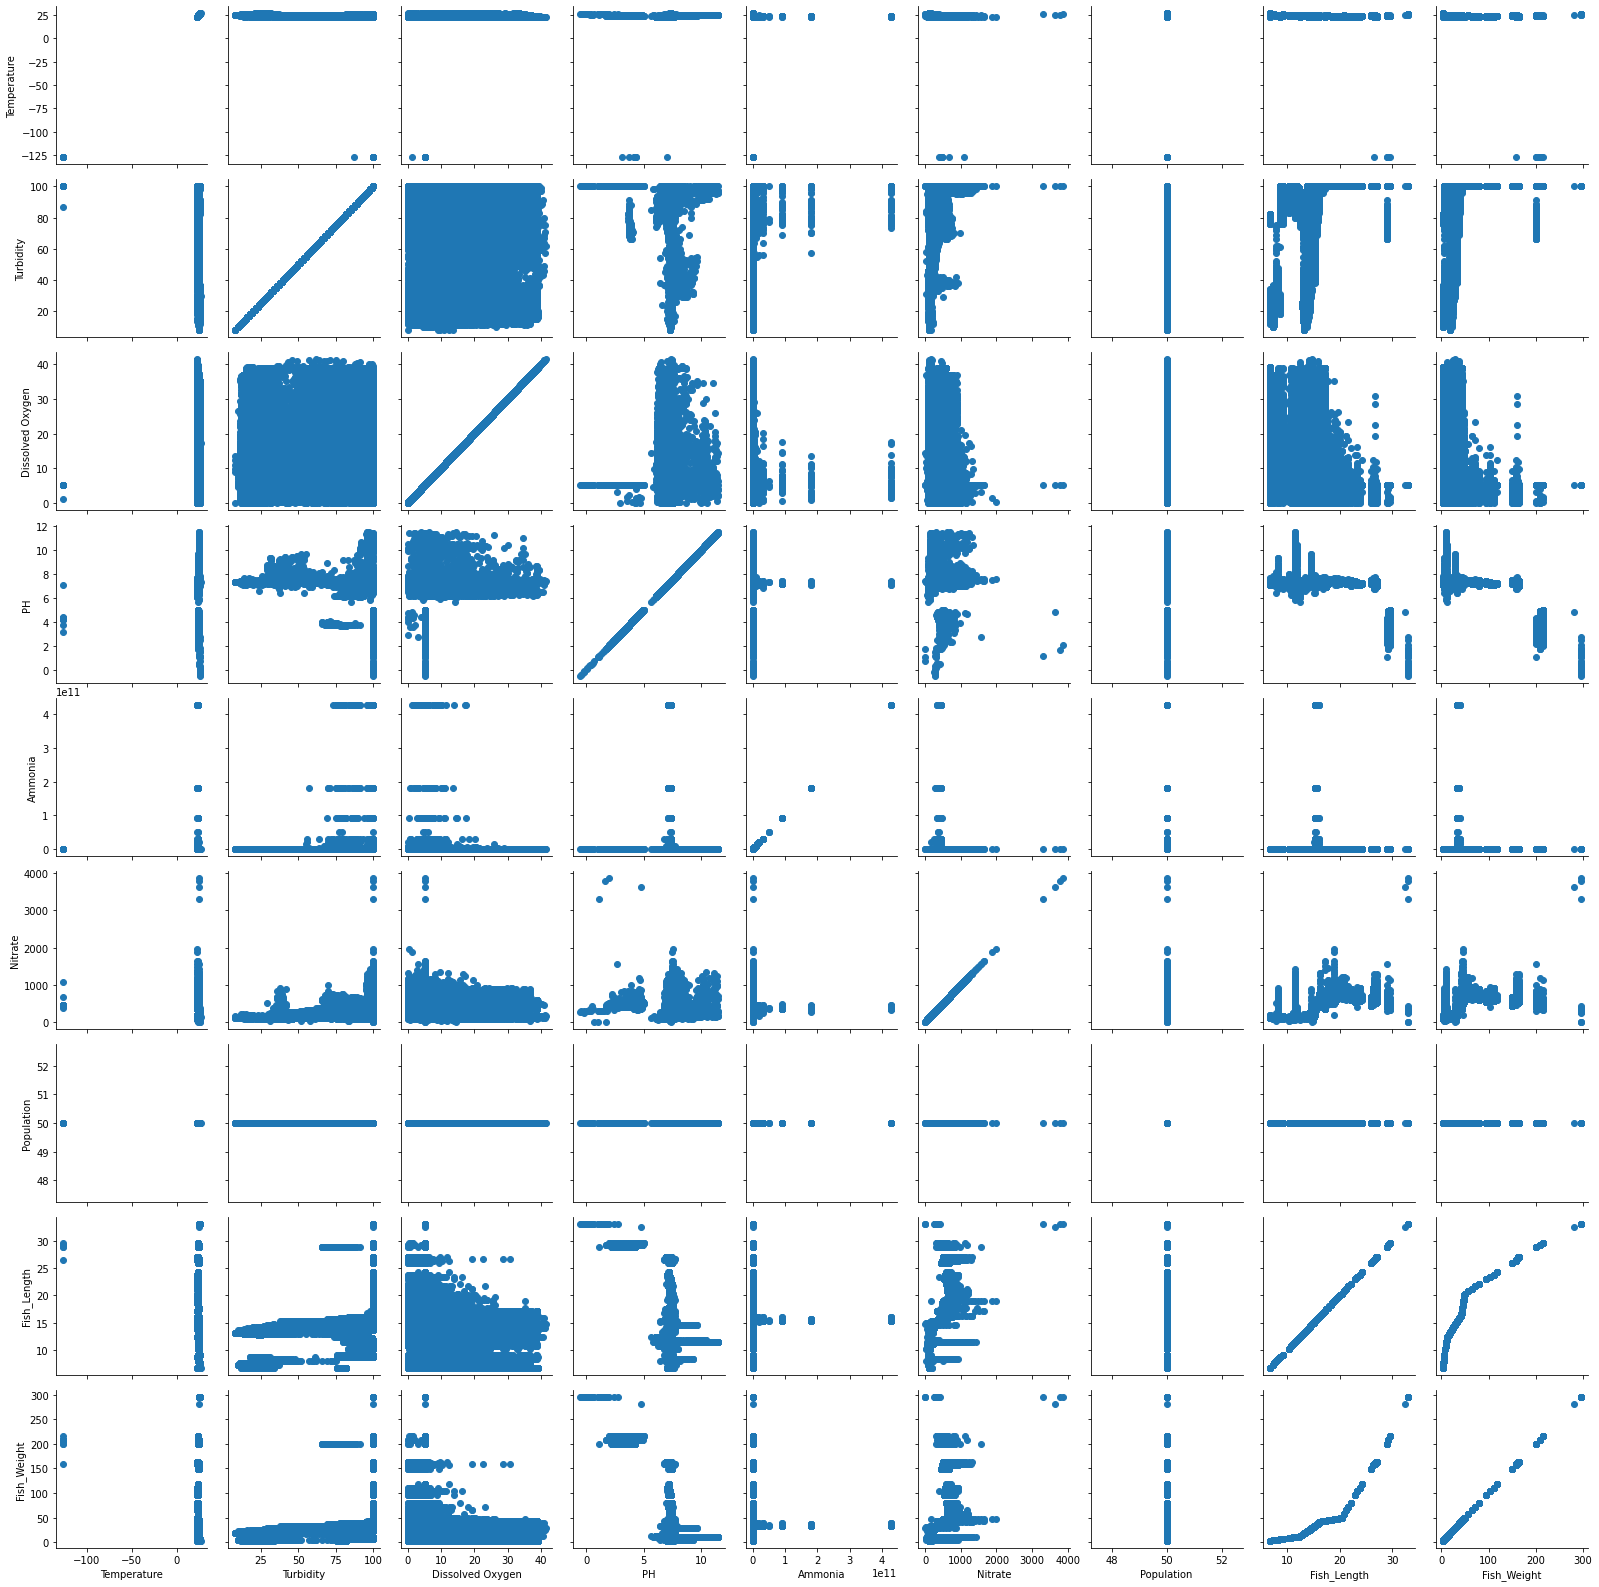

In [20]:
g = sns.PairGrid(df)
g.map(plt.scatter)

In [21]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,169185.0000,169185.0000,169185.0000,169185.0000,169078.0000,169185.0000,169185.0000,169185.0000,169185.0000,169185
mean,23.7795,83.3849,7.4562,7.1849,inf,380.6708,50.0000,16.0588,44.2590,2021-07-24 22:11:29.988184576
min,-127.0000,8.0000,0.0080,-0.5318,0.0000,0.0000,50.0000,6.7400,3.2000,2021-06-19 00:00:04
25%,23.3750,80.0000,5.0800,7.2443,5.7591,123.0000,50.0000,13.3200,19.3800,2021-07-09 05:05:59
50%,23.7500,98.0000,5.0800,7.3079,29.4257,417.0000,50.0000,15.5400,35.8300,2021-07-24 08:11:42
75%,24.1250,100.0000,8.0880,7.3442,1009.7664,585.0000,50.0000,18.8600,46.6800,2021-08-09 15:25:59
max,26.5625,100.0000,41.3840,11.4569,inf,3870.0000,50.0000,33.0000,294.9200,2021-10-12 15:05:46
std,1.5492,26.6519,6.4105,0.6294,nan,255.4436,0.0000,5.0017,45.5193,NaN


In [22]:
len(df["Fish_Weight"].unique())

76

In [23]:
a=df["Fish_Weight"].unique()
a

array([  3.2 ,   3.81,   4.42,   5.03,   5.64,   6.25,   6.86,   8.69,
         9.3 ,   9.91,  10.52,  11.13,  11.7 ,  12.98,  15.54,  16.82,
        18.1 ,  19.38,  20.66,  21.94,  23.22,  24.5 ,  25.78,  27.06,
        28.34,  29.6 ,  30.49,  31.38,  32.27,  33.16,  34.05,  34.94,
        35.83,  36.72,  37.61,  38.5 ,  39.39,  40.28,  41.11,  42.  ,
        42.52,  43.04,  43.56,  44.08,  44.6 ,  45.12,  45.64,  46.16,
        46.68,  47.2 ,  47.72,  48.24,  48.76,  49.3 ,  57.01,  64.72,
        72.43,  80.14,  95.56, 103.27, 110.98, 118.69, 149.53, 157.3 ,
       158.15, 159.  , 159.85, 160.7 , 162.4 , 163.25, 164.1 , 200.52,
       208.35, 216.18, 280.96, 294.92])

In [24]:
d=df["Date"].unique()

In [25]:
start=a[0]
print(d[0])
for i in range(len(a)-1):
    print(i)
    print(d[i+1],'-----------',a[i+1]-start)
    start=a[i+1]

2021-06-19
0
2021-06-20 ----------- 0.6099999999999999
1
2021-06-21 ----------- 0.6099999999999999
2
2021-06-22 ----------- 0.6100000000000003
3
2021-06-23 ----------- 0.6099999999999994
4
2021-06-24 ----------- 0.6100000000000003
5
2021-06-25 ----------- 0.6100000000000003
6
2021-06-28 ----------- 1.8299999999999992
7
2021-06-29 ----------- 0.6100000000000012
8
2021-06-30 ----------- 0.6099999999999994
9
2021-07-01 ----------- 0.6099999999999994
10
2021-07-02 ----------- 0.6100000000000012
11
2021-07-03 ----------- 0.5699999999999985
12
2021-07-04 ----------- 1.2800000000000011
13
2021-07-06 ----------- 2.5599999999999987
14
2021-07-07 ----------- 1.2800000000000011
15
2021-07-08 ----------- 1.2800000000000011
16
2021-07-09 ----------- 1.2799999999999976
17
2021-07-10 ----------- 1.2800000000000011
18
2021-07-11 ----------- 1.2800000000000011
19
2021-07-12 ----------- 1.2799999999999976
20
2021-07-13 ----------- 1.2800000000000011
21
2021-07-14 ----------- 1.2800000000000011
22
2021-0

In [26]:
len(df["Date"].unique())

76

In [27]:
f=df[df["Date"]==d[6]]

#use datetime_is_numeric = True to get statistics on the datetime column
desc = f.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,1473.0000,1473.0000,1473.0000,1473.0000,1473.0000,1473.0000,1473.0000,1473.0000,1473.0000,1473
mean,24.4997,90.9321,7.2453,7.2984,25.5908,109.0577,50.0000,9.0800,6.8600,2021-06-25 10:20:20.230821376
min,23.8125,76.0000,0.0670,6.7268,4.3459,75.0000,50.0000,9.0800,6.8600,2021-06-25 00:00:02
25%,24.0000,86.0000,3.6060,7.2897,20.1983,103.0000,50.0000,9.0800,6.8600,2021-06-25 04:28:34
50%,24.1250,90.0000,5.1660,7.3033,24.8076,107.0000,50.0000,9.0800,6.8600,2021-06-25 09:22:06
75%,25.1875,94.0000,8.1730,7.3079,30.1963,112.0000,50.0000,9.0800,6.8600,2021-06-25 16:35:29
max,25.4375,100.0000,38.9220,7.5621,59.8394,149.0000,50.0000,9.0800,6.8600,2021-06-25 21:35:09
std,0.6053,5.6856,6.1427,0.0324,10.1546,10.3643,0.0000,0.0000,0.0000,NaN


array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>],
      dtype=object)

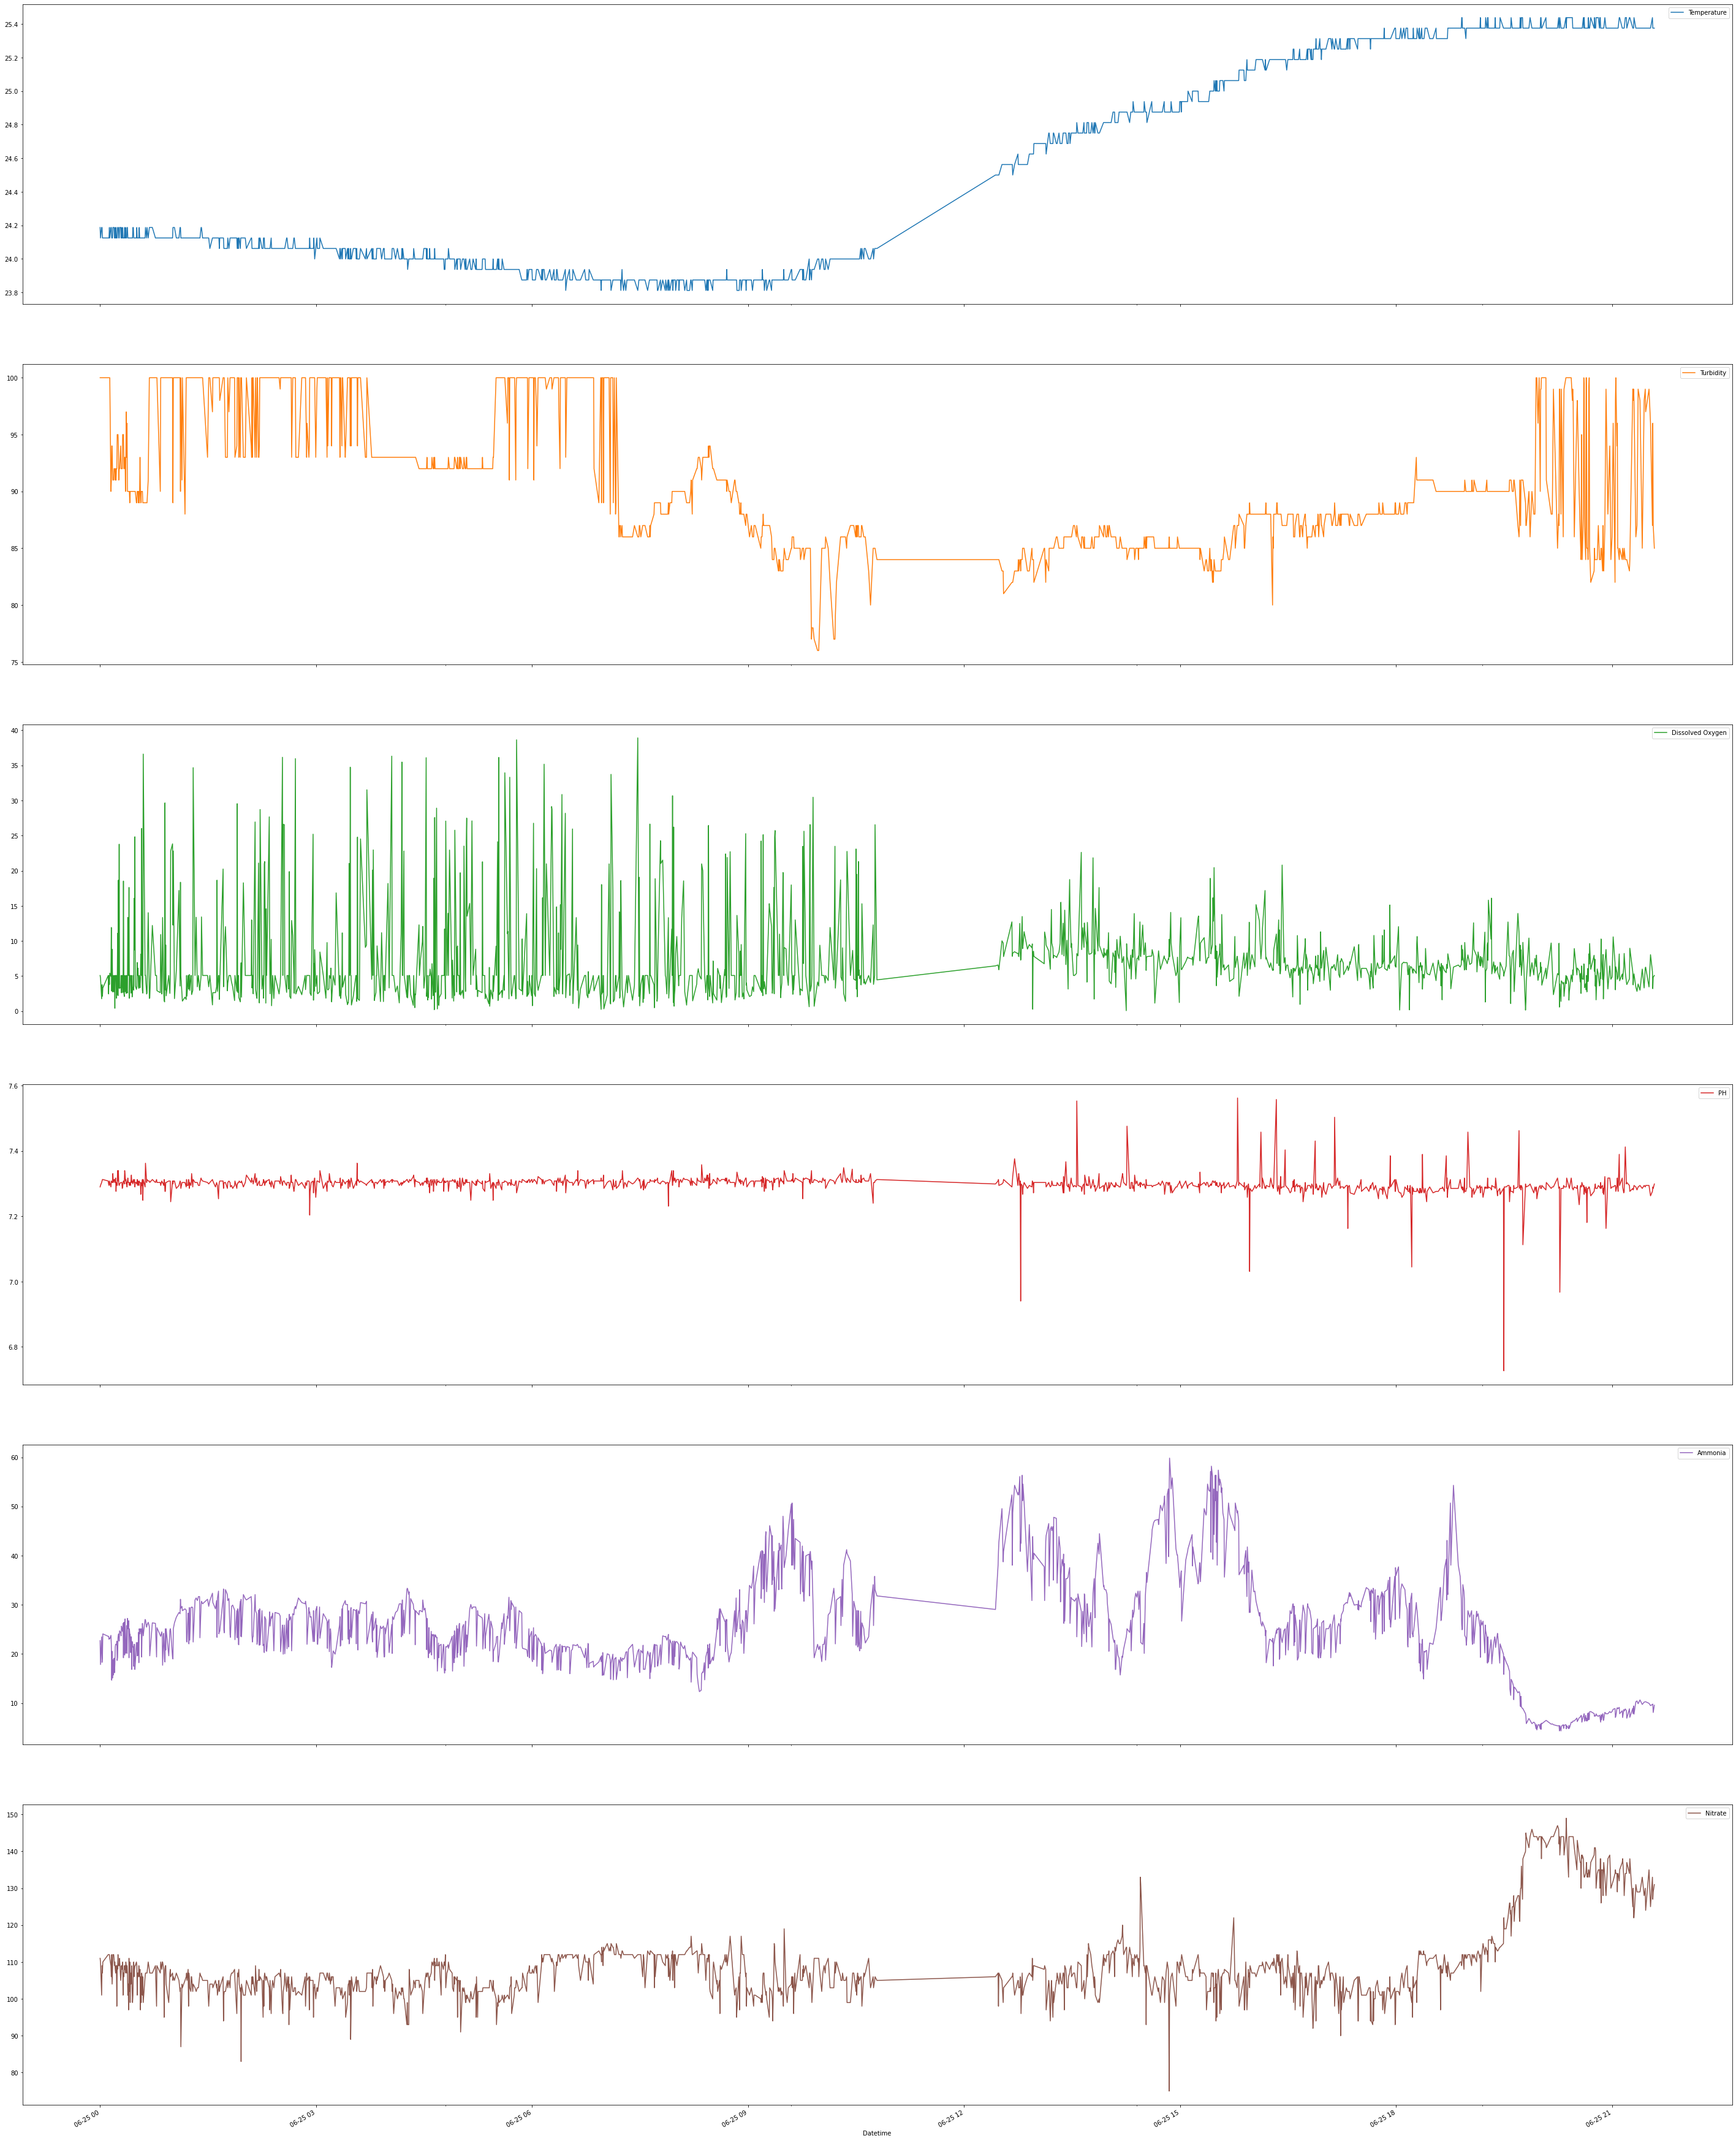

In [28]:
f.plot('Datetime',['Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate'], subplots = True, figsize = (50,70))

Find outliers and view the data distribution using a histogram

Using a histogram, we can see how the data is distributed. Having data that follows a normal distribution is necessary for some of the statistical techniques used to detect outliers. If the data doesn’t follow a normal distribution, the z-score calculation shouldn’t be used to find the outliers. 

In [31]:
df.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
count,169185.000000,169185.000000,169185.000000,169185.000000,1.690780e+05,169185.000000,169185.0,169185.000000,169185.000000
mean,23.779466,83.384898,7.456181,7.184931,inf,380.670804,50.0,16.058793,44.259006
std,1.549207,26.651853,6.410530,0.629428,NaN,255.443631,0.0,5.001695,45.519340
min,-127.000000,8.000000,0.008000,-0.531800,0.000000e+00,0.000000,50.0,6.740000,3.200000
25%,23.375000,80.000000,5.080000,7.244310,5.759120e+00,123.000000,50.0,13.320000,19.380000
50%,23.750000,98.000000,5.080000,7.307860,2.942574e+01,417.000000,50.0,15.540000,35.830000
75%,24.125000,100.000000,8.088000,7.344170,1.009766e+03,585.000000,50.0,18.860000,46.680000
max,26.562500,100.000000,41.384000,11.456930,inf,3870.000000,50.0,33.000000,294.920000


<AxesSubplot:xlabel='Temperature'>

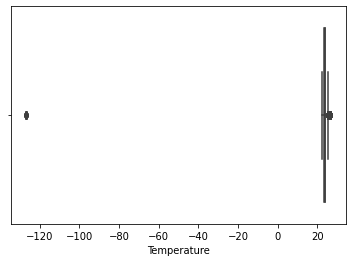

In [32]:
sns.boxplot(x=df['Temperature'])

<AxesSubplot:xlabel='Turbidity'>

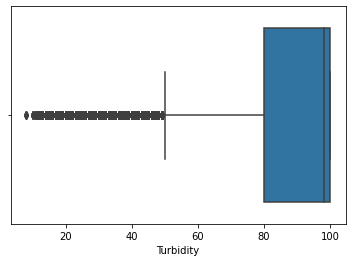

In [33]:
sns.boxplot(x=df['Turbidity'])

<AxesSubplot:xlabel='Dissolved Oxygen'>

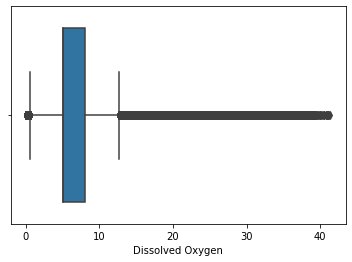

In [34]:
sns.boxplot(x=df['Dissolved Oxygen'])

<AxesSubplot:xlabel='PH'>

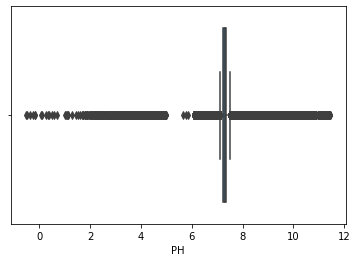

In [35]:
sns.boxplot(x=df['PH'])

<AxesSubplot:xlabel='Ammonia'>

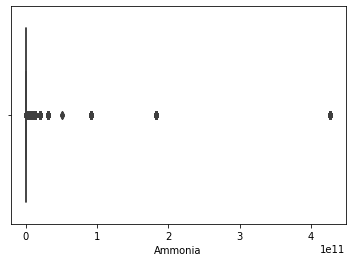

In [36]:
sns.boxplot(x=df['Ammonia'])

<AxesSubplot:xlabel='Nitrate'>

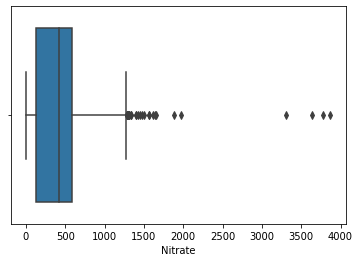

In [37]:
sns.boxplot(x=df['Nitrate'])

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

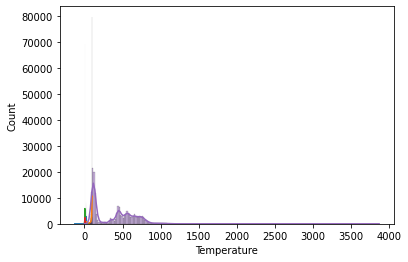

In [38]:
sns.histplot(df['Temperature'], kde=True)


<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

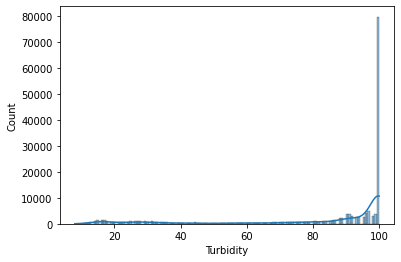

In [39]:
sns.histplot(df['Turbidity'], kde=True)

<AxesSubplot:xlabel='Dissolved Oxygen', ylabel='Count'>

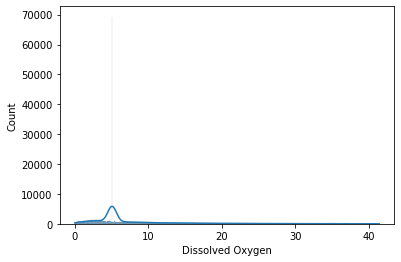

In [40]:
sns.histplot(df['Dissolved Oxygen'], kde=True)


<AxesSubplot:xlabel='PH', ylabel='Count'>

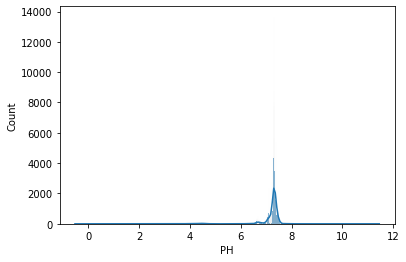

In [41]:
sns.histplot(df['PH'], kde=True)


<AxesSubplot:xlabel='Nitrate', ylabel='Count'>

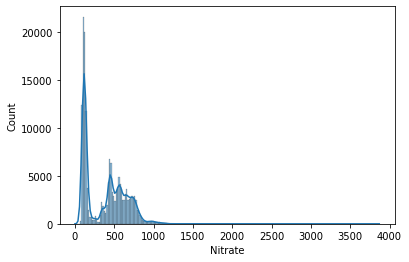

In [42]:
sns.histplot(df['Nitrate'], kde=True)